# Zach Kelly

## Research question/interests

The objective behind this repository is to extract meaningful information from a ufc dataset and present it in a more easily interpreted format. 

The following research questions will be investigated:
1. Fighters with the most submission in the UFC.
2. Mean fighter height in the UFC weight divisions.

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df = pd.read_csv("../data/raw/raw_data.csv")
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


# Milestone 3

### Task 1: Conduct an Exploratory Data Analysis (EDA)

In [190]:
df.info() # find which data types are used in the dataset and the class it's stored in. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [191]:
df.shape # find the size of the dataframe.

(6012, 144)

In [192]:
df.describe().T # find general statistics of the dataframe.

,count,mean,std,min,25%,50%,75%,max
B_avg_KD,4585.0,0.247476,0.378509,0.0,0.000000,0.015625,0.5000,5.00
B_avg_opp_KD,4585.0,0.176818,0.324633,0.0,0.000000,0.000000,0.2500,3.00
B_avg_SIG_STR_pct,4585.0,0.453310,0.130458,0.0,0.376489,0.450000,0.5275,1.00
B_avg_opp_SIG_STR_pct,4585.0,0.434290,0.132618,0.0,0.351045,0.427500,0.5100,1.00
B_avg_TD_pct,4585.0,0.292650,0.273628,0.0,0.031250,0.250000,0.5000,1.00
...,...,...,...,...,...,...,...,...
R_Height_cms,6008.0,178.991788,8.812985,152.4,172.720000,180.340000,185.4200,210.82
R_Reach_cms,5606.0,183.562347,10.585313,152.4,177.800000,182.880000,190.5000,213.36
R_Weight_lbs,6010.0,170.686356,35.724626,115.0,145.000000,170.000000,185.0000,345.00
B_age,5840.0,29.293151,4.063297,18.0,26.000000,29.000000,32.0000,51.00


In [193]:
# list all the column names inside our dataset
x = list(df.columns)
for i in x:
    print(i)

R_fighter
B_fighter
Referee
date
location
Winner
title_bout
weight_class
B_avg_KD
B_avg_opp_KD
B_avg_SIG_STR_pct
B_avg_opp_SIG_STR_pct
B_avg_TD_pct
B_avg_opp_TD_pct
B_avg_SUB_ATT
B_avg_opp_SUB_ATT
B_avg_REV
B_avg_opp_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_avg_opp_TOTAL_STR_att
B_avg_opp_TOTAL_STR_landed
B_avg_TD_att
B_avg_TD_landed
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_BODY_att
B_avg_BODY_landed
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_LEG_att
B_avg_LEG_landed
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_CTRL_time(seconds)
B_avg_opp_CTRL_time(seconds)
B_total

Lets explore the columns relevant to our research questions and find the range of possible column entries for each.

In [194]:
# explore the columns relevant to the research questions and list the possible values for each column entry
display(df['Winner'].unique())
display(df['R_fighter'].unique())
display(df['B_fighter'].unique())
display(df['R_win_by_Submission'].unique())
display(df['B_win_by_Submission'].unique())
display(df['R_Height_cms'].unique())
display(df['B_Height_cms'].unique())
display(df['weight_class'].unique())

array(['Red', 'Blue', 'Draw'], dtype=object)

array(['Adrian Yanez', 'Trevin Giles', 'Tai Tuivasa', ...,
       'Jason DeLucia', 'Orlando Wiet', 'Scott Morris'], dtype=object)

array(['Gustavo Lopez', 'Roman Dolidze', 'Harry Hunsucker', ...,
       'David Levicki', 'Ray Wizard', 'Sean Daugherty'], dtype=object)

array([ 0,  2,  1,  5,  6,  3,  4, 10,  9, 11, 13,  7,  8, 12],
      dtype=int64)

array([ 1,  0,  2,  4,  3,  5, 14,  6, 13,  9,  7, 11,  8], dtype=int64)

array([170.18, 182.88, 187.96, 160.02, 167.64, 185.42, 177.8 , 165.1 ,
       190.5 , 175.26, 172.72, 162.56, 195.58, 193.04, 180.34, 154.94,
       157.48, 198.12, 200.66, 210.82, 152.4 ,    nan, 203.2 , 208.28])

array([165.1 , 187.96, 152.4 , 180.34, 177.8 , 190.5 , 170.18, 167.64,
       195.58, 172.72, 182.88, 160.02, 193.04, 162.56, 175.26, 185.42,
       200.66, 198.12, 154.94, 157.48, 210.82, 203.2 ,    nan, 208.28])

array(['Bantamweight', 'Middleweight', 'Heavyweight', 'WomenStrawweight',
       'WomenBantamweight', 'Lightweight', 'Welterweight', 'Flyweight',
       'LightHeavyweight', 'Featherweight', 'WomenFlyweight',
       'WomenFeatherweight', 'CatchWeight', 'OpenWeight'], dtype=object)

The above output describes all possible values in each column and the datatype if only one exists. For instance, the Winner column has possible values Red, Blue, or Draw and is type object. The output also tell us we have missing data (nan values) in some of our columns, which is an indicator we may want to drop the corresponding rows from the dataset.   

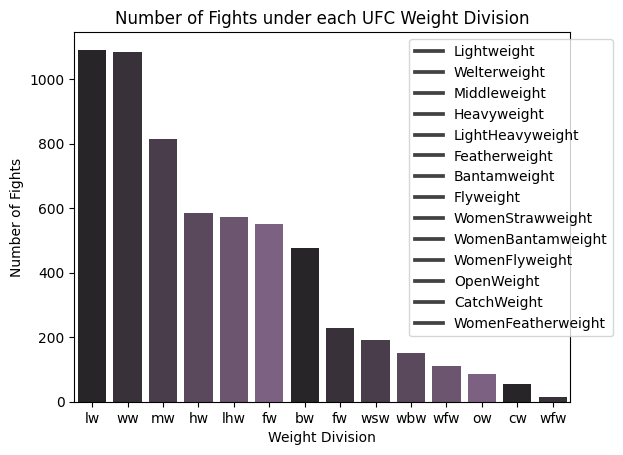

In [195]:
# create barplot of the number of fights in each weight division
x = df['weight_class'].value_counts()

div_fight = pd.DataFrame(x)
div_fight['division'] = div_fight.index
div_fight = div_fight.rename(columns={'weight_class':'num_fights'})
palette = sns.dark_palette("muted purple", input="xkcd")
ax = sns.barplot(data=div_fight, x ='division', y='num_fights',palette=palette)

ax.set (
    title = 'Number of Fights under each UFC Weight Division',
    xlabel = 'Weight Division',
    ylabel = 'Number of Fights',
)

ax.get_xticks()
ax.set_xticklabels(['lw','ww','mw','hw','lhw','fw','bw','fw','wsw','wbw','wfw','ow','cw','wfw'])
plt.legend(div_fight['division'], loc = 'upper right', bbox_to_anchor=(1.1, 1))

plt.savefig('../images/fight_dist.png')

The above figure describes the distrubition of fight data for each weight divisions. The data set contains the most number of fights for the lightweight and welterweight divisions, and does not contain many fights for the female divisions. 

,number_of_fights
Donald Cerrone,36
Jim Miller,36
Andrei Arlovski,34
Jeremy Stephens,33
Diego Sanchez,32
Demian Maia,32
Rafael Dos Anjos,30
Clay Guida,30
Michael Bisping,29
Gleison Tibau,28


True     9885
False    2139
dtype: int64


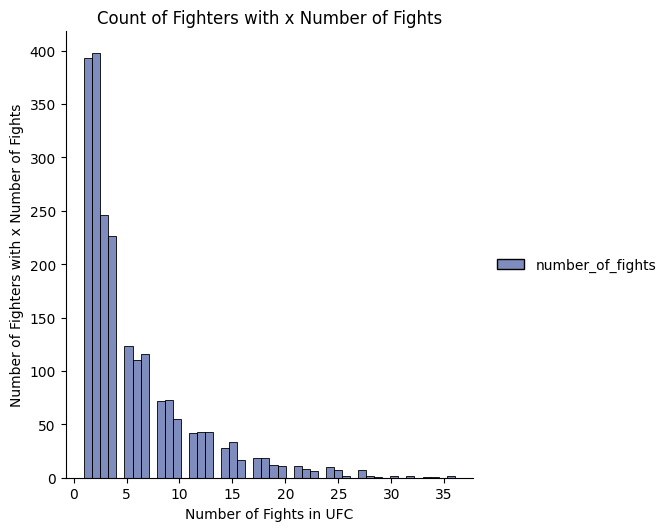

In [196]:
# find how many fights the ufc fighters have according to this dataset
fighters = pd.concat([df['R_fighter'],df['B_fighter']],axis = 0) # stack the red and blue fighter columns 
x = fighters.value_counts() # count the number of recorded fights for each fighter

fights = pd.DataFrame(x).rename(columns={0:'number_of_fights'})

display(fights.head(10))

ax = sns.displot(data=fights, palette='dark') 

ax.set(
    title = 'Count of Fighters with x Number of Fights',
    xlabel = 'Number of Fights in UFC',
    ylabel = 'Number of Fighters with x Number of Fights'
)

# find the total number of instances fighters occur more than once in the dataset (count refering to true) and
# the total number of instances fighters occur only once (count refering to false)
print(fighters.duplicated().value_counts())


The above table list the fighters with the most number of recorded UFC fights. The figure above decribes how many fighters have 'x' number of recorded UFC fights. This figure tells us there are many fighters with zero to five fights, but only few with more than thirty fights.

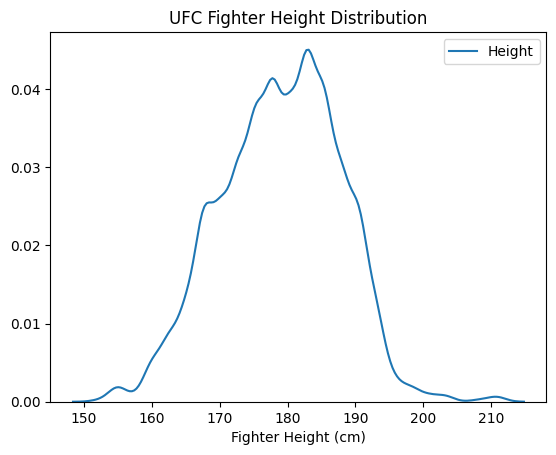

In [197]:
# create displot of fighter height
height1 = df['R_Height_cms']
height2 = df['B_Height_cms']

height = pd.concat([height1,height2],axis=0).dropna().reset_index().drop(columns = 'index').rename(columns = {0:'Height'})
ax = sns.kdeplot(data = height)

ax.set (
    title = 'UFC Fighter Height Distribution',
    ylabel = '',
    xlabel = 'Fighter Height (cm)'
)

plt.savefig('../images/height_dist.png')

The figure above describes the probability of height amoung the UFC data set. Based on observation, the most probable UFC fighter height is approximately 183 centimeters.

### Task 2: Data Analysis Pipeline
1. Load Data
2. Clean Data
3. Process Data

In [198]:
# import the raw data set (comma delimeted file)
df = pd.read_csv("../data/raw/raw_data.csv")

# create dataframe using only the relevant columns to the research questions from the raw data set 'df'.
df_clean = pd.concat(
    [df['Winner'],df['R_fighter'],df['B_fighter'],df['weight_class'],df['R_Height_cms'],df['B_Height_cms'],df['R_win_by_Submission'],df['B_win_by_Submission']],
    axis = 1
)

# remove all rows containing NaN values, create new index column and remove the old, then rename column keys to desired format
df_clean = df_clean.dropna().rename(columns={
    'Winner':'winner',
    'R_fighter':'r_fighter','B_fighter':'b_fighter',
    'R_Height_cms':'r_height_in','B_Height_cms':'b_height_in',
    'R_win_by_Submission':'r_submission_w','B_win_by_Submission':'b_submission_w'
    })
df_clean = df_clean.drop(df_clean[df_clean['winner']=='Draw'].index).reset_index().drop(columns='index')
# reset index after each drop

df_processed = df_clean.copy()

# convert values in height columns from centimeters to inches
df_processed['r_height_in'] = [df_processed['r_height_in'][i]*(0.393701) for i in range(len(df_processed['r_height_in']))]
df_processed['b_height_in'] = [df_processed['b_height_in'][i]*(0.393701) for i in range(len(df_processed['r_height_in']))]

df_processed.head(10)

,winner,r_fighter,b_fighter,weight_class,r_height_in,b_height_in,r_submission_w,b_submission_w
0,Red,Adrian Yanez,Gustavo Lopez,Bantamweight,67.000036,65.000035,0,1
1,Red,Trevin Giles,Roman Dolidze,Middleweight,72.000039,74.000040,0,0
2,Red,Tai Tuivasa,Harry Hunsucker,Heavyweight,74.000040,74.000040,0,0
3,Blue,Cheyanne Buys,Montserrat Conejo,WomenStrawweight,63.000034,60.000032,0,0
4,Blue,Marion Reneau,Macy Chiasson,WomenBantamweight,66.000036,71.000038,2,1
5,Blue,Leonardo Santos,Grant Dawson,Lightweight,72.000039,70.000038,2,2
6,Blue,Song Kenan,Max Griffin,Welterweight,72.000039,71.000038,0,0
7,Red,Derek Brunson,Kevin Holland,Middleweight,73.000039,75.000041,1,2
8,Red,Montel Jackson,Jesse Strader,Bantamweight,70.000038,67.000036,1,0
9,Red,Bruno Silva,JP Buys,Flyweight,72.000039,65.000035,0,0


### Task 3: Method Chaining

In [199]:
import functions1 as f1

In [200]:
df_processed = f1.load_and_process('../data/raw/raw_data.csv')
df_processed.head(10)

,winner,r_fighter,b_fighter,weight_class,r_height_in,b_height_in,r_submission_w,b_submission_w
0,Red,Adrian Yanez,Gustavo Lopez,Bantamweight,67.000036,65.000035,0,1
1,Red,Trevin Giles,Roman Dolidze,Middleweight,72.000039,74.000040,0,0
2,Red,Tai Tuivasa,Harry Hunsucker,Heavyweight,74.000040,74.000040,0,0
3,Blue,Cheyanne Buys,Montserrat Conejo,WomenStrawweight,63.000034,60.000032,0,0
4,Blue,Marion Reneau,Macy Chiasson,WomenBantamweight,66.000036,71.000038,2,1
5,Blue,Leonardo Santos,Grant Dawson,Lightweight,72.000039,70.000038,2,2
6,Blue,Song Kenan,Max Griffin,Welterweight,72.000039,71.000038,0,0
7,Red,Derek Brunson,Kevin Holland,Middleweight,73.000039,75.000041,1,2
8,Red,Montel Jackson,Jesse Strader,Bantamweight,70.000038,67.000036,1,0
9,Red,Bruno Silva,JP Buys,Flyweight,72.000039,65.000035,0,0


### Task 4: Data Analysis 

##### Research Question 1: fighters with most number of submission wins in the ufc

In [201]:
# stack columns red and blue for fighters and submissions, then combine into dataframe

fighters = pd.concat([df_processed['r_fighter'],df_processed['b_fighter']],axis = 0)

submissions = pd.concat([df_processed['r_submission_w'],df_processed['b_submission_w']],axis = 0)

df1 = pd.DataFrame(pd.concat([fighters,submissions],axis = 1)).rename(columns = {0:'fighter',1:'submission_wins'}).reset_index().drop(columns = 'index')

display(df1)

,fighter,submission_wins
0,Adrian Yanez,0
1,Trevin Giles,0
2,Tai Tuivasa,0
3,Cheyanne Buys,0
4,Marion Reneau,2
...,...,...
11775,Scott Baker,0
11776,Alberta Cerra Leon,0
11777,Robert Lucarelli,0
11778,David Levicki,0


In [202]:
df1['submission_wins'].value_counts() # there eleven occurences with ten or more submission wins

0     7667
1     2141
2     1032
3      454
4      247
5       99
6       63
7       35
8       19
9       12
10       4
13       3
11       2
12       1
14       1
Name: submission_wins, dtype: int64

In [203]:
df_rank = df1.groupby(by = 'fighter',as_index=False).apply(lambda x: x.loc[x.submission_wins.idxmax()]).sort_values(by = 'submission_wins',ascending = False)
df_rank.head(20)

,fighter,submission_wins
321,Charles Oliveira,14
520,Demian Maia,11
934,Jim Miller,10
1494,Nate Diaz,9
671,Frank Mir,8
1161,Kenny Florian,7
737,Gunnar Nelson,7
396,Cole Miller,7
964,Joe Lauzon,7
1750,Royce Gracie,7


The above table list the UFC fighters with the most number of submission wins. The UFC fighter with the most submission is Charles Oliveria.

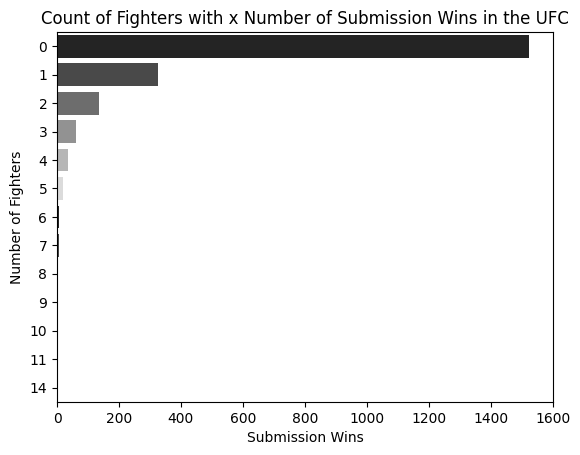

In [204]:
# drop rows containing duplicate fighters
df_line = df_rank.drop_duplicates(subset='fighter',keep='first')
#df_line.insert(loc=2,column='count',value=df_line['submission_wins'].value_counts())

# create countplot of the number of fighters with x number of submission wins

palette = sns.color_palette('gray')
ax = sns.countplot(data=df_line, y = 'submission_wins', palette=palette)

ax.set (
    title = 'Count of Fighters with x Number of Submission Wins in the UFC',
    xlabel = 'Submission Wins',
    ylabel = 'Number of Fighters',
)

plt.savefig('../images/sub_dist.png')

The figure above shows that the majority of fighters have less than 1 submission win and less than 50 fighters have 5 or more submission wins in the UFC.

##### Research Question 2: mean fighter height in UFC weight divisions

The tallest fighter in the UFC Lightweight Division is 76.00 inches
The shortest fighter in the UFC Lightweight Division is 65.00 inches


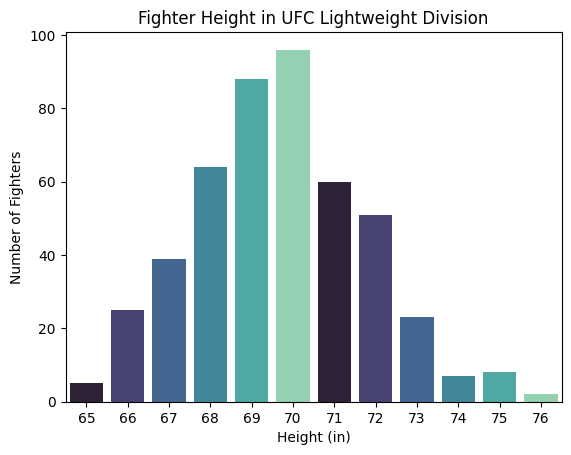

In [205]:
df2 = df_processed.copy()

lw = df2[df2['weight_class'] == 'Lightweight'] # get data corresponding to lightweight division

fighters = pd.concat([lw['r_fighter'],lw['b_fighter']],axis = 0)
heights = pd.concat([lw['r_height_in'],lw['b_height_in']],axis = 0) # stack the red and blue height columns

# concatenate stacked height and fighter columns into dataframe
lw = pd.DataFrame(pd.concat([fighters,heights],axis = 1)).rename(columns = {0:'fighter',1:'height'}).drop_duplicates(subset='fighter',keep = 'first').reset_index().drop(columns = 'index')

palette = sns.color_palette("mako")

ax = sns.countplot(data = lw, x = 'height', palette=palette)

ax.set(
    title = 'Fighter Height in UFC Lightweight Division',
    ylabel = 'Number of Fighters',
    xlabel = 'Height (in)',
)

max = lw['height'].max()
print(f'The tallest fighter in the UFC Lightweight Division is {max:.2f} inches')
min = lw['height'].min()
print(f'The shortest fighter in the UFC Lightweight Division is {min:.2f} inches')

ax.get_xticks()
ax.set_xticklabels(range(65,77,1))

plt.savefig('../images/lw_height.png')

Based on observation of the figure above, the most common height in the UFC Lightweight division is 70 inches.

The tallest fighter in the UFC Womens Featherweight Division is 72.00 inches
The shortest fighter in the UFC Womens Featherweight Division is 66.00 inches


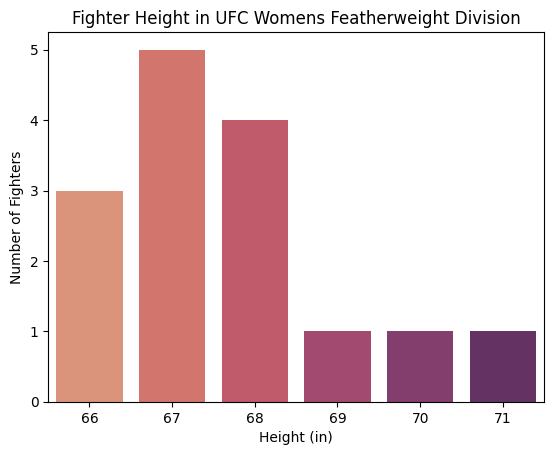

In [206]:
df2 = df_processed.copy()

wfw = df2[df2['weight_class'] == 'WomenFeatherweight'] # get data corresponding to the womens featherweight division

fighters = pd.concat([wfw['r_fighter'],wfw['b_fighter']],axis = 0)
heights = pd.concat([wfw['r_height_in'],wfw['b_height_in']],axis = 0) # stack the red and blue height columns

# concatenate stacked height and fighter columns into dataframe
wfw = pd.DataFrame(pd.concat([fighters,heights],axis = 1)).rename(columns = {0:'fighter',1:'height'}).drop_duplicates(subset='fighter',keep = 'first').reset_index().drop(columns = 'index')

palette = sns.color_palette("flare")

ax = sns.countplot(data = wfw, x = 'height', palette = palette) 

ax.set(
    title = 'Fighter Height in UFC Womens Featherweight Division',
    ylabel = 'Number of Fighters',
    xlabel = 'Height (in)',
)

max = wfw['height'].max()
print(f'The tallest fighter in the UFC Womens Featherweight Division is {max:.2f} inches')
min = wfw['height'].min()
print(f'The shortest fighter in the UFC Womens Featherweight Division is {min:.2f} inches')

ax.get_xticks()
ax.set_xticklabels(range(66,72,1))

plt.savefig('../images/wfw_height.png')

Based on observation of the figure above, the most common height in the UFC Womens Featherweight division is 67 inches.

Lets find approximately how many fighters are in each weight divison via manipulation of our processed data in section 2 and 3.

In [207]:
# Copy the processed dataframe
df_weightclass = df_processed.copy()
# vertically stack the red and blue instances for the fighter column
fighters = pd.concat([df_weightclass['r_fighter'],df_weightclass['b_fighter']],axis = 0)
# duplicate the division column and vertically stack to match 'fighters' length
division = pd.concat([df_weightclass['weight_class'],df_weightclass['weight_class']],axis = 0)
# remove rows containing duplicate fighters 
df_division = pd.concat([fighters, division], axis = 1).drop_duplicates(subset = 0, keep = 'first')
# count the number of fighters in each weight division
x =  df_division.value_counts(subset='weight_class')
# convert series type to dataframe and reformat
df_division = pd.DataFrame(x).reset_index().rename(columns={'weight_class':'Division',0:'Fighters'})

df_division


,Division,Fighters
0,Welterweight,378
1,Lightweight,343
2,Middleweight,280
3,Heavyweight,220
4,Featherweight,202
5,Bantamweight,175
6,LightHeavyweight,168
7,Flyweight,83
8,WomenStrawweight,71
9,OpenWeight,62


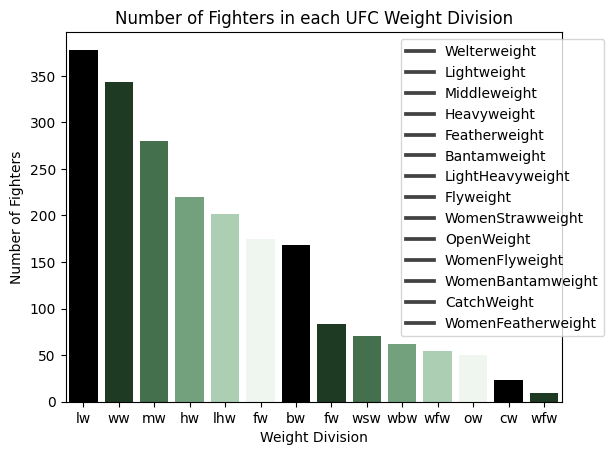

In [208]:
palette = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True)

ax = sns.barplot(data=df_division, x ='Division', y='Fighters', palette=palette)

ax.set (
    title = 'Number of Fighters in each UFC Weight Division',
    xlabel = 'Weight Division',
    ylabel = 'Number of Fighters',
)

ax.get_xticks()
ax.set_xticklabels(['lw','ww','mw','hw','lhw','fw','bw','fw','wsw','wbw','wfw','ow','cw','wfw'])
plt.legend(df_division['Division'], loc = 'upper right',bbox_to_anchor=(1.1, 1))

plt.savefig('../images/div_fighters.png')

# Milestone 4

### Export the milestone 3 data to .csv files. These .csv files will be used to create a Tableau dashboard.

In [209]:
# export submission dataframe to csv
df_rank.to_csv(path_or_buf=r'..\dashboard\submission.csv', index=False)

# export divison dataframe to csv
df_division.to_csv(path_or_buf=r'..\dashboard\divisions.csv', index=False)

# export lightweight dataframe to csv
lw.to_csv(path_or_buf=r'..\dashboard\lw.csv', index=False)

# export womens featherweight dataframe to csv
wfw.to_csv(path_or_buf=r'..\dashboard\wfw.csv', index=False)